In [75]:
import pandas as pd

df= pd.read_csv("../data/heart_cleaned.csv")


#print basic information about the dataset
print("Firts ten rows: \n",df.head(10))
print("Total columns: \n", df.columns)

Firts ten rows: 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3 

In [76]:
#CHECK FOR duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [77]:
#numeric and categorical columns
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
print("\nNumeric features: ", numeric_features)
print("Categorical features: ", categorical_features)


Numeric features:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [78]:
#CHECK FOR MISSING VALUES
missing_values = df.isnull().sum()  
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


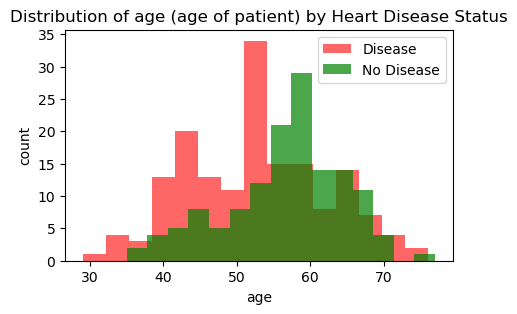

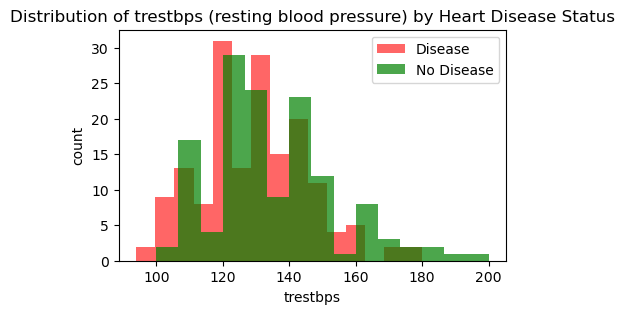

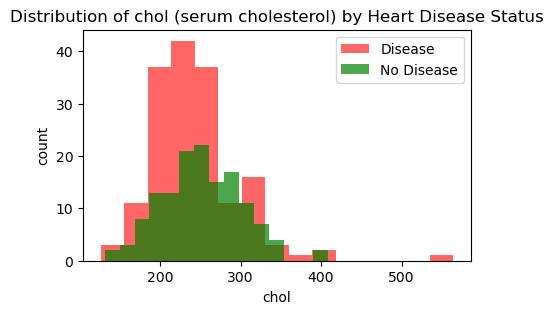

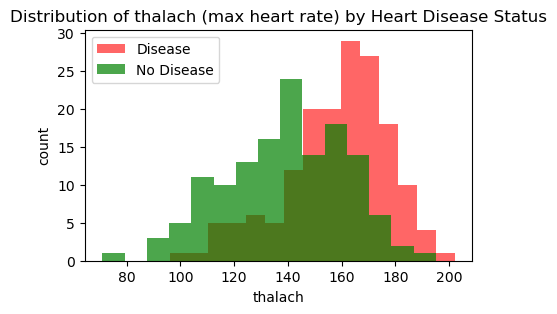

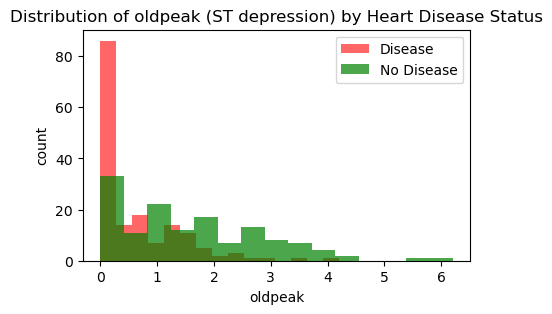

In [84]:
#visualizing the distribution of numeric features
import os
import matplotlib.pyplot as plt


full_name = {
    'cp': 'chest pain type',
    'age' : 'age of patient',
    'fbs' : 'fasting blood sugar >120 mg/dl',
    'trestbps': 'resting blood pressure',
    'chol': 'serum cholesterol',
    'thalach': 'max heart rate',
    'exang': 'exercise-induced angina',
    'oldpeak': 'ST depression',
    'slope': 'slope of peak ST segment',
    'ca': 'major vessels (0-3)',
    'thal': 'thalassemia type',
    'sex': 'sex (0=male, 1=female)',
    'target': 'heart disease',
    'restecg': 'Resting Electrocardiographic Results.'
}

   

#target =0 no disease, 1 disease
target = 'target'

#creating a folder to save plots
if not os.path.exists("plots"):
    os.makedirs("plots")
    
#visualizing numeric features   
for col in numeric_features:
    plt.figure(figsize=(5,3)) 
    plt.hist(df[df[target] == 1][col], bins=15, alpha=0.6, label='Disease', color='red') 
    plt.hist(df[df[target] == 0][col], bins=15, alpha=0.7, label='No Disease', color='green')
    plt.title(f'Distribution of {col} ({full_name[col]}) by Heart Disease Status')
    plt.xlabel(col)
    plt.ylabel("count")
    plt.legend()
    plt.savefig(f"plots/{col}_distribution.png")
   


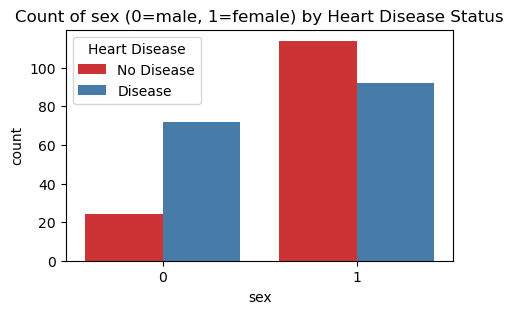

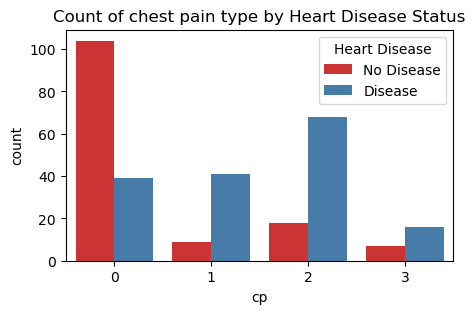

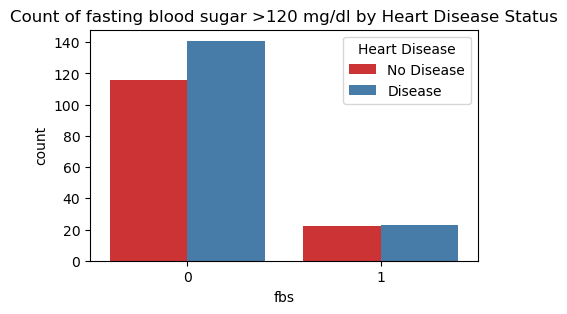

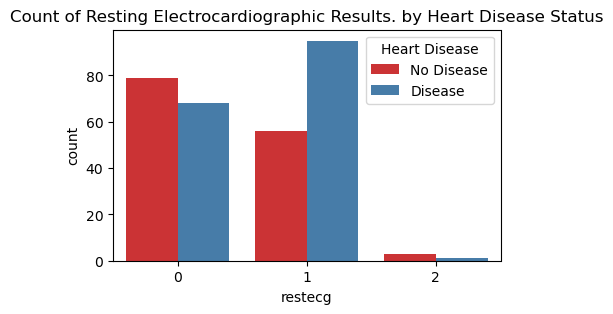

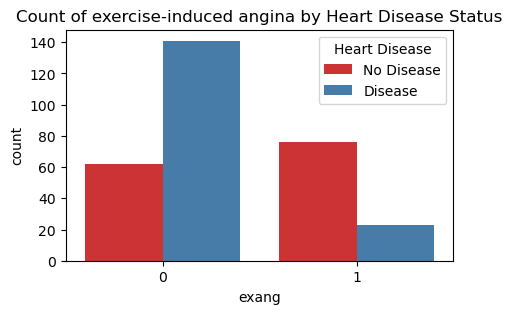

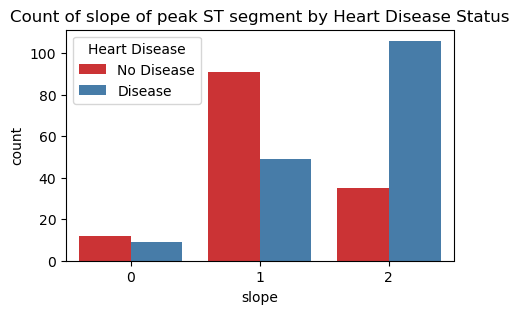

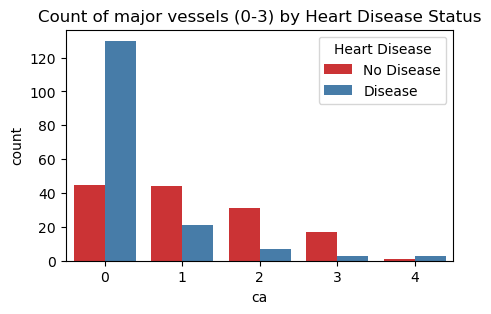

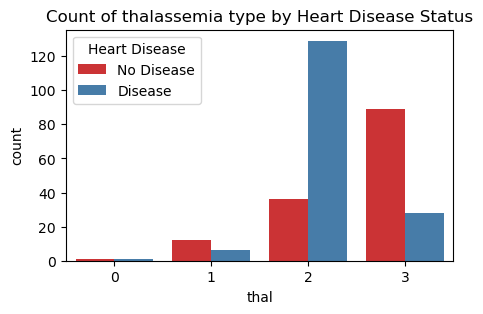

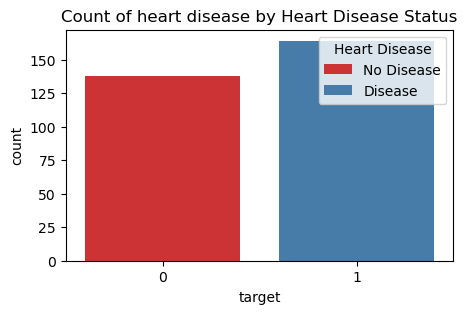

In [80]:
#visualizing categorical features
import seaborn as sns  

for col in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, hue='target', data=df, palette='Set1')
    plt.title(f'Count of {full_name[col]} by Heart Disease Status') #title name
    plt.xlabel(col) #x-axis label
    plt.ylabel("count")  #y-axis label
    plt.legend(title='Heart Disease', labels=['No Disease', 'Disease']) #legend
    plt.savefig(f"plots/{col}_countplot.png")   
    